# Data Analysis of Hospital Encounters for Behavioral Health

> Abby Zurasky

## Introduction

This dataset contains data collected by the State of California, specifically, the data was published by the Department of Health Care Access and Information. The data is regarding the counts of inpatient hospitalizations and emergency department visits for patients with Behavioral Health Disorders throughout the state of California. The data was collected in the year 2020 and 2021, and includes people of all genders suffering froma variety of behavioral health disorders including mental health and substance abuse disorders. 

## Required Packages

I'm going to install the following packages to expand the Python language to do the analysis required for this data science project.

In [1]:
# Importing libraries and packages to analyze the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


I am installing the config magic command which is used to set high resolution figures.

In [2]:
# Importing the config magic command to display the plots in the notebook
%config InlineBackend.figure_format = 'retina'

### Data Import

I am importing the data set that will be analyzed throughout the rest of the reading.

In [3]:
# Import the spreadsheet and assign it to the variable df
df = pd.read_csv('hospitalencountersforbehavioralhealth.csv')

### Verification of Data

The following code gives the first 10 rows of the data frame. 

In [4]:
# Print the first few rows of the DataFrame
df.head(10)

,Year,Geography,Pattype,Category,Cat_desc,Dxgroup,Count,Total,Percent
0,2020,Statewide,Inpatient,DX Category,All Discharges,All Other Diagnoses,2299697,3444532.0,66.763700
1,2020,Statewide,Inpatient,DX Category,All Discharges,Co-Occuring Disorders,292114,3444532.0,8.480513
2,2020,Statewide,Inpatient,DX Category,All Discharges,Mental Health Disorders,523853,3444532.0,15.208249
3,2020,Statewide,Inpatient,DX Category,All Discharges,Substance Use Disorders,328868,3444532.0,9.547538
4,2020,Statewide,Inpatient,Sex,Female,All Other Diagnoses,1319139,1874686.0,70.365864
5,2020,Statewide,Inpatient,Sex,Female,Co-Occuring Disorders,125126,1874686.0,6.674504
6,2020,Statewide,Inpatient,Sex,Female,Mental Health Disorders,329047,1874686.0,17.552113
7,2020,Statewide,Inpatient,Sex,Female,Substance Use Disorders,101374,1874686.0,5.407519
8,2020,Statewide,Inpatient,Sex,Male,All Other Diagnoses,980365,1569574.0,62.460578
9,2020,Statewide,Inpatient,Sex,Male,Co-Occuring Disorders,166970,1569574.0,10.637918


I am going to check to see what years data was collected during. 

In [5]:
# find the unique values in the Year column
df['Year'].unique()

array([2020, 2021])

I am going to print the names of all the columns in the dataframe. 

In [6]:
# Print the columns of the DataFrame
df.columns

Index(['Year', 'Geography', 'Pattype', 'Category', 'Cat_desc', 'Dxgroup',
       'Count', 'Total', 'Percent'],
      dtype='object')

I am going to use the shape attribute to see the number of rows and columns in the dataframe. 

In [31]:
# Print the shape of the DataFrame
df.shape

(356, 10)

I am checking the type of the 'Count' column.

In [7]:
# Find the type of the Count column
type('Count')

str

I am making the 'Count' column numeric for later analysis. 

In [8]:
# Make the Count column numeric
df['Count'] = pd.to_numeric(df['Count'], errors='coerce')

Now I am rechecking the 'Count' column to make sure it is numeric. 

In [9]:
# Now find the type of the Count column
type(df['Count'])

pandas.core.series.Series

Now I a repeating the process for the Total column.

In [10]:
# Now make the Total column numeric
df['Total'] = pd.to_numeric(df['Total'], errors='coerce')

In [11]:
# Check to make sure it is numeric
type(df['Total'])

pandas.core.series.Series

Again, I am repeating the process for the 'Percent' column.

In [12]:
# Now make the Percent column numeric
df['Percent'] = pd.to_numeric(df['Percent'], errors='coerce')

In [13]:
# Find the type of the Percent column to make sure it is numeric
type(df['Percent'])

pandas.core.series.Series

I run a test to see if there are any null values in the dataframe.

In [23]:
# Check for missing values in the DataFrame
df.isnull().sum()

Year          0
Geography     0
Pattype       0
Category      0
Cat_desc      0
Dxgroup       0
Count         0
Total        60
Percent      60
dtype: int64

## Relational Plots

### First is a scatterplot displaying the 'Count' and 'Total' data. 

The following scatterplot is comparing the 'Count' and 'Total' columns. The 'Count' column has data regarding the total Mental Health inpatient hospitalization discharges or emergency department visits per demographic category value, whereas the 'Total' column has the total inpatient hospitalization discharges or emergency department visits per demographic category value.

/var/folders/h2/cf9j1yhj7h120bgd6pr29fmc0000gn/T/ipykernel_12875/1984984115.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df['Count'], df['Total'], cmap='coolwarm')


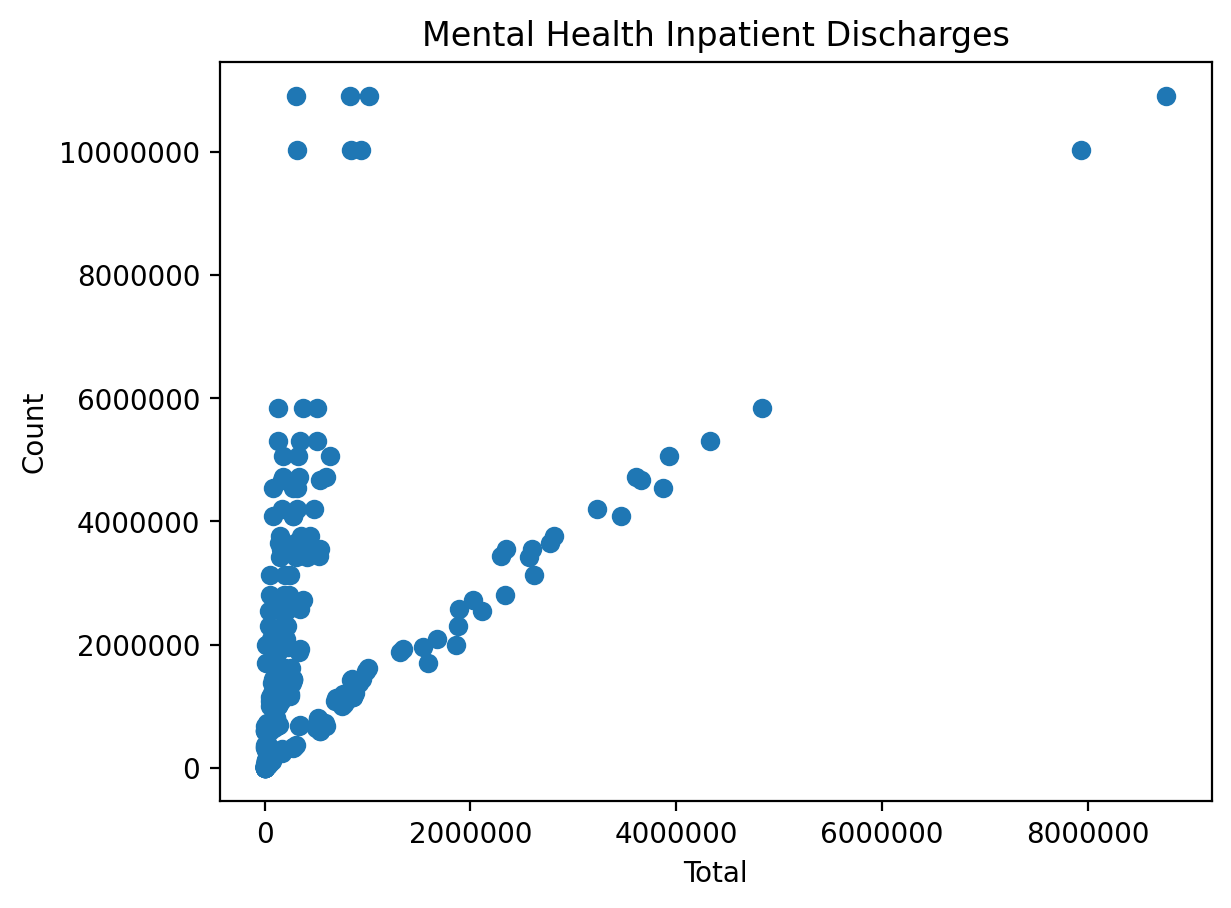

In [58]:
# Create a scatter plot of the Count and Total columns (comparing the number of people admitted to the number of people discharged)
plt.scatter(df['Count'], df['Total'], cmap='coolwarm')
plt.title('Mental Health Inpatient Discharges')
# Add a y-axis label
plt.ylabel('Count')
# Add an x-axis label
plt.xlabel('Total')
plt.ticklabel_format(style='plain')

### Below is a barplot displaying the 'Pattype' column. 

The graph displays that there was two categories in this column, denoted 'Inpatient' and 'ED Visit' on the graph. The category 'Inpatient' represents the data collected from inpatient hospitalizations, and the 'ED Visit' category represents the data collected from the number of emergency department visits.

<BarContainer object of 1 artists>

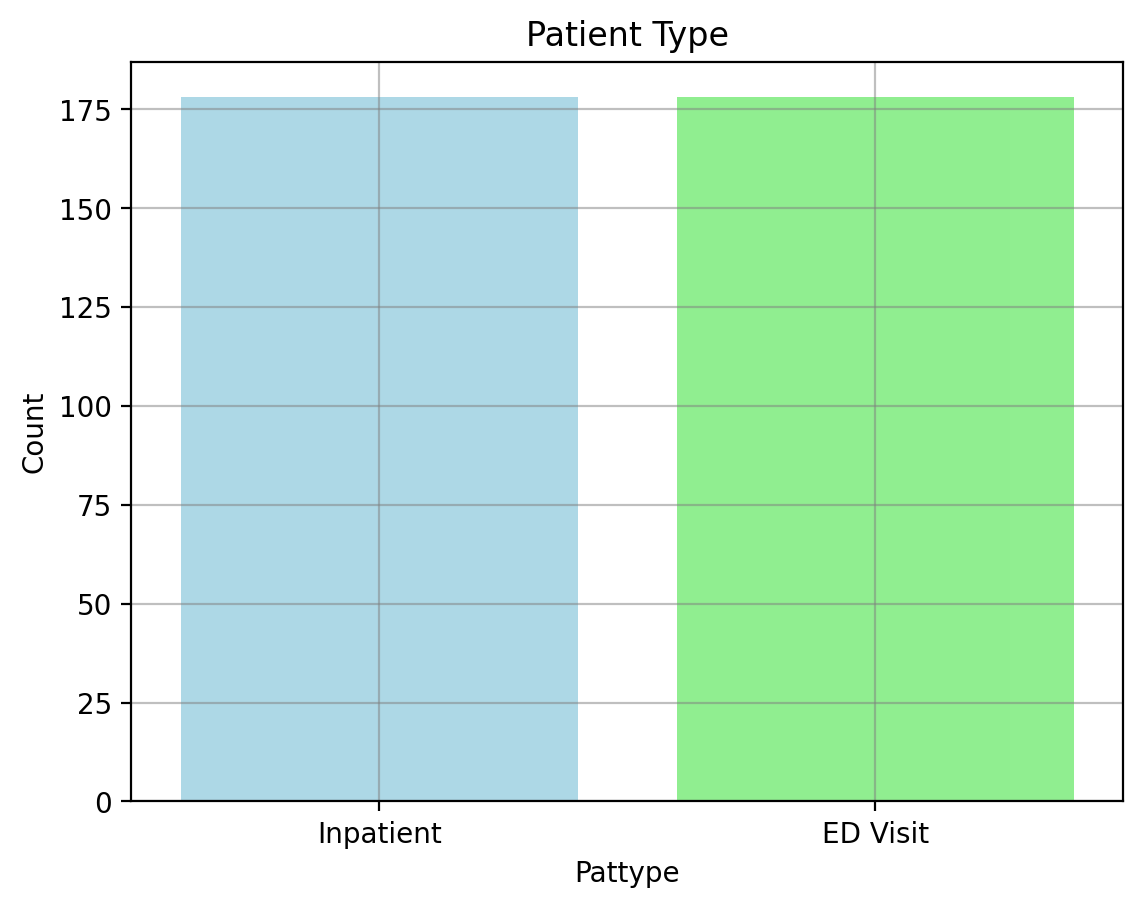

In [73]:
# Create a bar plot of the Pattype column
df['Pattype'].value_counts().plot(kind='bar')
# Change the color of the grid to transparent grey
plt.grid(color='grey', alpha=0.5)
# Flip the x-axis labels
plt.xticks(rotation=0)
# Add a title to the plot
plt.title('Patient Type')
# Add a y-axis label
plt.ylabel('Count')
# Change the color of the 'Inpatient' bar to light blue
plt.bar('Inpatient', 178, color='lightblue')
# Change the color of the 'Outpatient' bar to sage green
plt.bar('Outpatient', 178, color='lightgreen')

I am making the 'Pattype' column numerical so it can be added to the scatterplot by denoting the variable 'Inpatient (IP) Hospitalization' the value 1 and the variable 'Emergency Department (ED) Visit' the value 0. 

In [43]:
# Make a new column where the value of patient type is numeric
# Where Inpatient (IP) Hospitilization = 1 and Emergency Department (ED) Visit = 0
df['PatientType'] = df['Pattype'].map({'IP Hospitalization': 1, 'ED Visit': 0})

Now, there will be a scatterplot comparing the 'PatientType' column and the 'Total' column. The plot may seem odd, but it is quite revealing. It essentially shows that all the data in the 'Total' column is from emergency department visits, not inpatient hospitilizations. 

Text(0.5, 0, 'Patient Type — Inpatient = 1, Outpatient = 0')

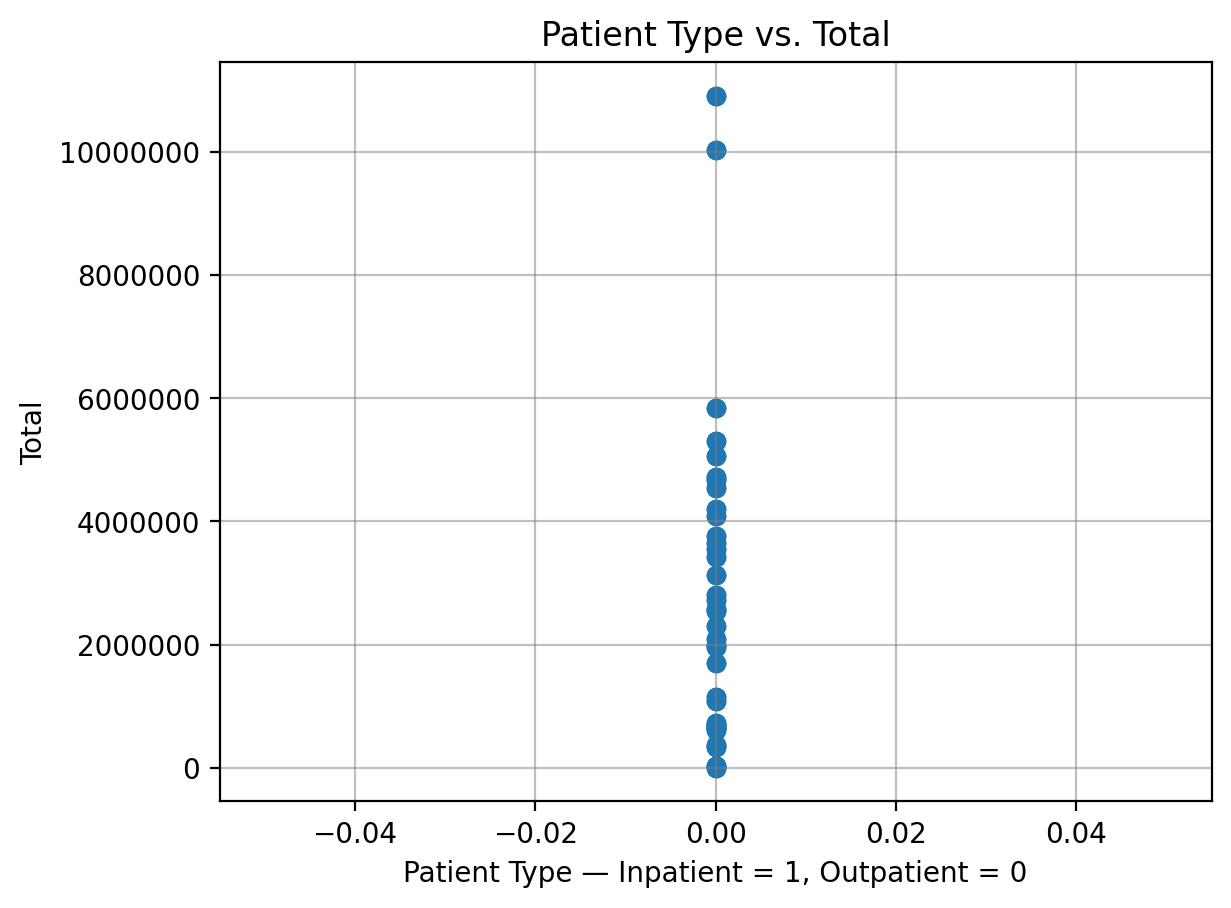

In [98]:
# Make a scatter plot comparing the PatientType and Total columns
plt.scatter(df['PatientType'], df['Total'])
# Make it not scientific notation
plt.ticklabel_format(style='plain')
# Add light grey gridlines
plt.grid(color='grey', alpha=0.5)
# Add a title to the plot
plt.title('Patient Type vs. Total')
# Add a y-axis label
plt.ylabel('Total')
# Add an x-axis label
plt.xlabel('Patient Type — Inpatient = 1, Outpatient = 0')

#### Display the years that the data was collected during.

The graph shows that the data was collected between the years 2020 and 2021, with there being slightly more data collected in 2021. 

<BarContainer object of 1 artists>

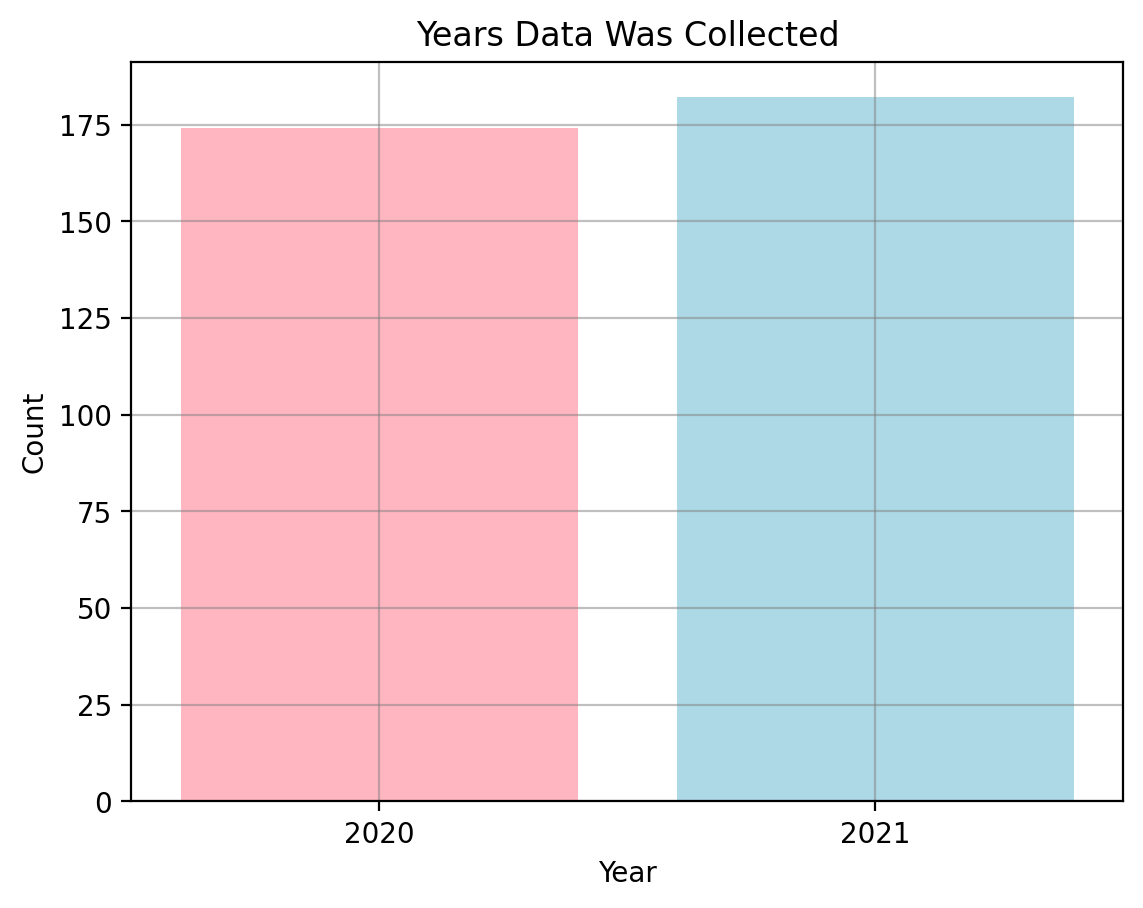

In [85]:
# Create a bar plot of the Year column
df['Year'].value_counts().sort_index().plot(kind='bar')
# Change the color of the grid to transparent grey
plt.grid(color='grey', alpha=0.5)
# Flip the x-axis labels
plt.xticks(rotation=0)
# Add a title to the plot
plt.title('Years Data Was Collected')
# Add a y-axis label
plt.ylabel('Count')
# Change the color of the '2016' bar to light pink
plt.bar('2020', 174, color='lightpink')
# Change the color of the '2017' bar to light purple
plt.bar('2021', 182, color='lightblue')

### Now, there will be a graph for the 'Dxgroup' column. 

First, a test will be run to determine the unique values in the 'Dxgroup' column.

In [26]:
# List all the possible values of the dxgroup column
df['Dxgroup'].unique()

array(['All Other Diagnoses', 'Co-Occuring Disorders',
       'Mental Health Disorders', 'Substance Use Disorders',
       'Mood disorders', 'Anxiety disorders', 'Adjustment disorders',
       'Intentional self-harm, suicidal ideation, and suicide attempts',
       'Schizophrenia and other psychotic disorders',
       'Personality disorders',
       'Impulse control disorders not elsewhere classified',
       'Miscellaneous mental health conditions',
       'Alcohol-related disorders', 'Cannabis-related disorders',
       'Opioid-related disorders', 'Stimulant-related disorders',
       'Sedative-related disorders', 'Hallucinogen-related disorders',
       'Miscellaneous substance-related disorders', 'mood', 'anxiety',
       'adjustment', 'suicidal', 'schizophrenia', 'personality',
       'impulse', 'misc_mh', 'alcohol', 'cannabis', 'opioids',
       'stimulant', 'sedative', 'hallucinogen', 'misc_sud'], dtype=object)

Next, a test will be run to determine the value counts of each of the values. 

In [29]:
# do value counts of the different Dxgroups
df['Dxgroup'].value_counts()

Dxgroup
All Other Diagnoses                                               74
Substance Use Disorders                                           74
Co-Occuring Disorders                                             74
Mental Health Disorders                                           74
hallucinogen                                                       2
sedative                                                           2
stimulant                                                          2
opioids                                                            2
cannabis                                                           2
mood                                                               2
misc_mh                                                            2
impulse                                                            2
personality                                                        2
schizophrenia                                                      2
suicidal                  

Now, some of the values will be combined, so there are less variables in the 'Dxgroup' column. The new column with combined variables will be denoted 'Dxgroup2', and the different categories will be 'All Other Diagnoses', 'Co-Occuring Disorders', 'Mental Health Disorders', and 'Substance Use Disorders'.

In [30]:
# Make a new column in the DataFrame called 'Dxgroup2' that is based on the values in the Dxgroup column
# If the value in the Dxgroup column is 'Substance Use Disorders' or 'Co-Occuring Disorders' or 'Mental Health Disorders' keep the names the same
# If the value in the Dxgroup column is anything else, change the value to 'All Other Diagnoses'
df['Dxgroup2'] = df['Dxgroup'].apply(lambda x: x if x in ['Substance Use Disorders', 'Co-Occuring Disorders', 'Mental Health Disorders'] else 'All Other Diagnoses')
df['Dxgroup2'].value_counts()

Dxgroup2
All Other Diagnoses        134
Co-Occuring Disorders       74
Mental Health Disorders     74
Substance Use Disorders     74
Name: count, dtype: int64

Now a graph displaying the 'Dxgroup2' column will display the counts for the new categories. 

<BarContainer object of 1 artists>

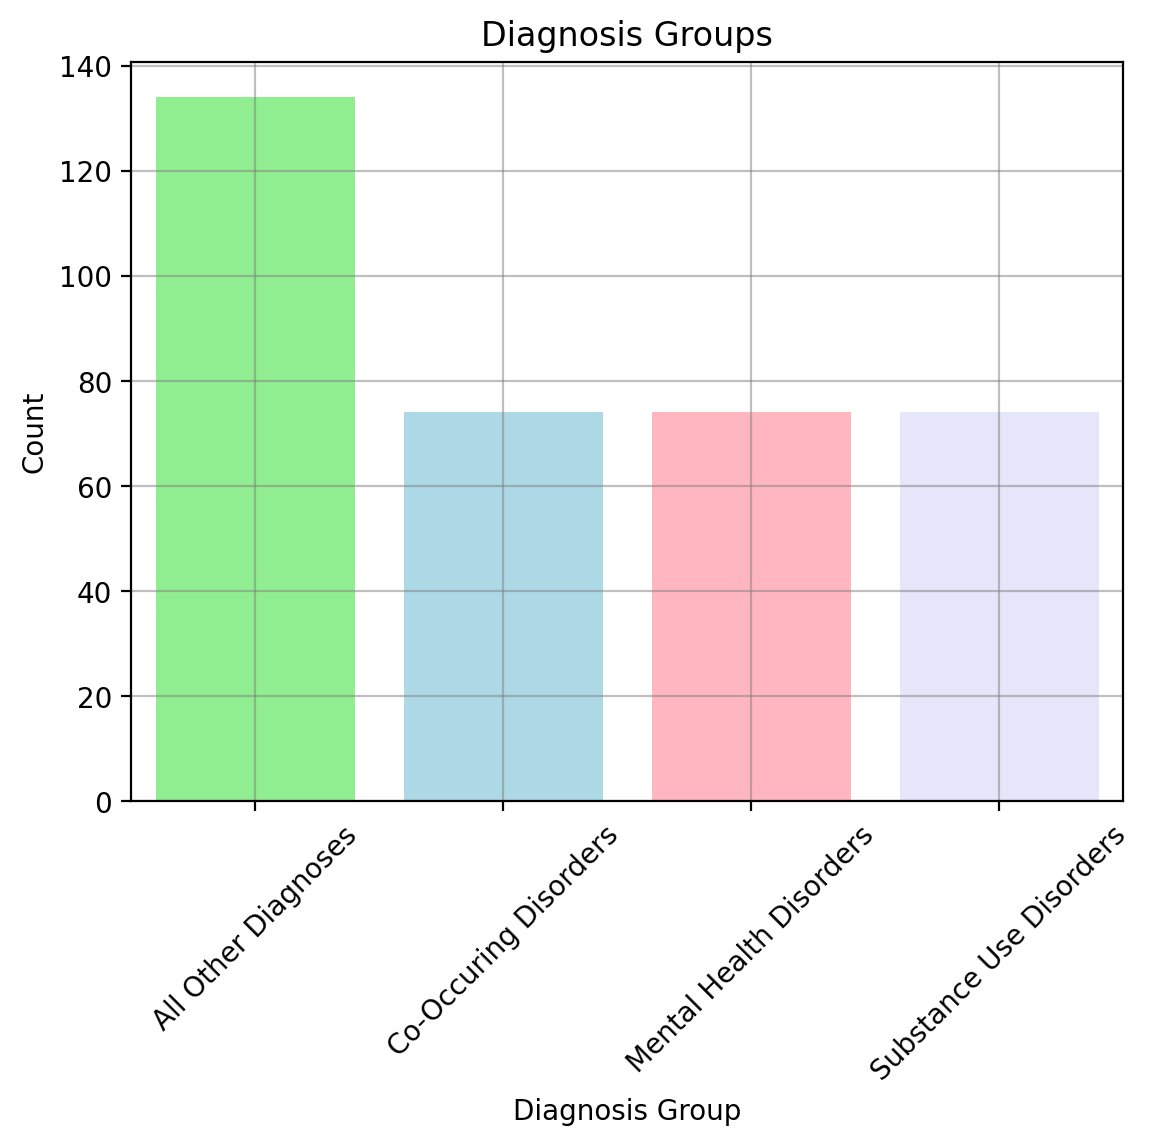

In [92]:
# Create a bar plot of the Dxgroup2 column
df['Dxgroup2'].value_counts().plot(kind='bar')
# Change the color of the grid to transparent grey
plt.grid(color='grey', alpha=0.5)
# Flip the x-axis labels
plt.xticks(rotation=45)
# Add a title to the plot
plt.title('Diagnosis Groups')
# Add a y-axis label
plt.ylabel('Count')
plt.xlabel('Diagnosis Group')
# Change the colors of the bars in the graph.
plt.bar('Substance Use Disorders', 134, color='lightgreen')
plt.bar('Mental Health Disorders', 74, color='lightblue')
plt.bar('Co-Occuring Disorders', 74, color='lightpink')
plt.bar('All Other Diagnoses', 74, color='lavender')

Now, there will be a graph displaying the 'Category' column.

In [99]:
# Show the values for the 'Category' column
df['Category'].value_counts()

Category
Race           96
Payer          80
Age            72
MH Category    60
Sex            32
DX Category    16
Name: count, dtype: int64

<BarContainer object of 1 artists>

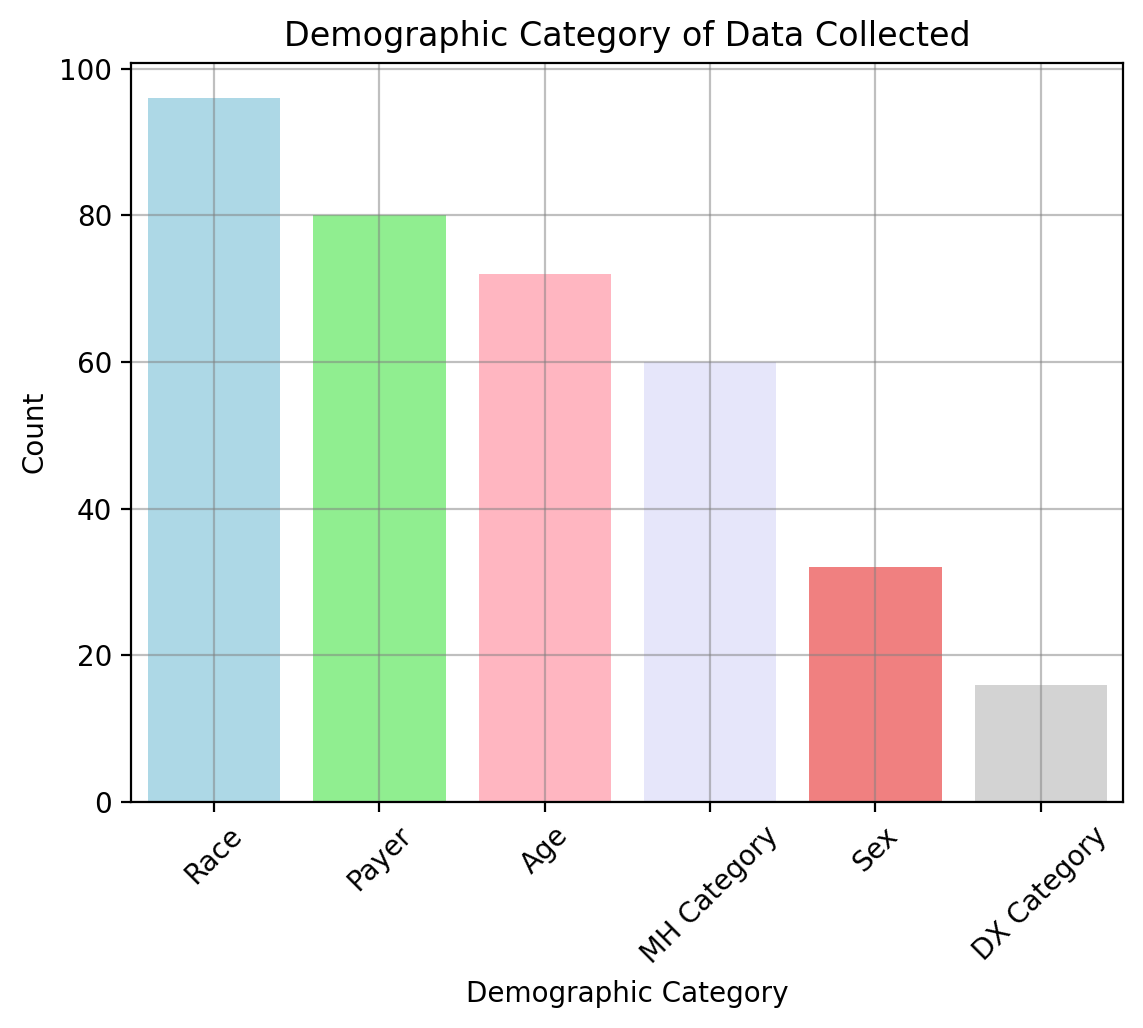

In [103]:
# Create a bar plot of the Category column
df['Category'].value_counts().plot(kind='bar')
# Change the color of the grid to transparent grey
plt.grid(color='grey', alpha=0.5)
# Flip the x-axis labels
plt.xticks(rotation=45)
# Add a title to the plot
plt.title('Demographic Category of Data Collected')
# Add a y-axis label
plt.ylabel('Count')
plt.xlabel('Demographic Category')
# Change the colors of the bars in the graph.
plt.bar('Race', 96, color='lightblue')
plt.bar('Payer', 80, color='lightgreen')
plt.bar('Age', 72, color='lightpink')
plt.bar('MH Category', 60, color='lavender')
plt.bar('Sex', 32, color='lightcoral')
plt.bar('DX Category', 16, color='lightgrey')
